# Install Kaggle package

In [1]:
! pip install -qqq kaggle

In [2]:
# Set Kaggle API credentials
from google.colab import userdata
import os

os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

In [3]:
# Download dataset from Kaggle
!kaggle datasets download -d uciml/iris

! unzip "iris.zip"

Dataset URL: https://www.kaggle.com/datasets/uciml/iris
License(s): CC0-1.0
  0% 0.00/3.60k [00:00<?, ?B/s]
100% 3.60k/3.60k [00:00<00:00, 7.74MB/s]
Archive:  iris.zip
replace Iris.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# Data Preprocessing

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv("Iris.csv")

In [6]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


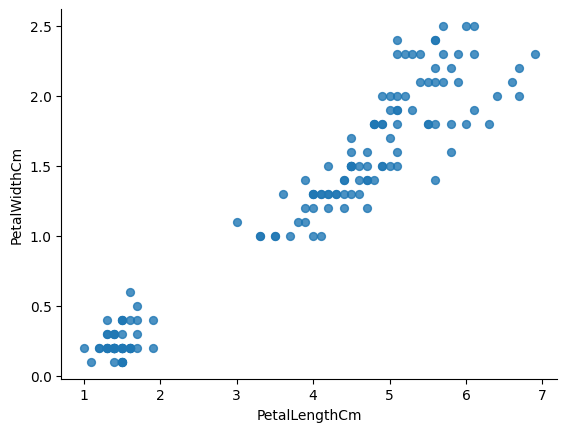

In [7]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [8]:
df.isnull().any()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

In [9]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
data = {}

for i, label in enumerate(df['Species'].unique()):
  data[label] = i

In [11]:
df['label'] = df['Species'].map(data)

In [12]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,label
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2


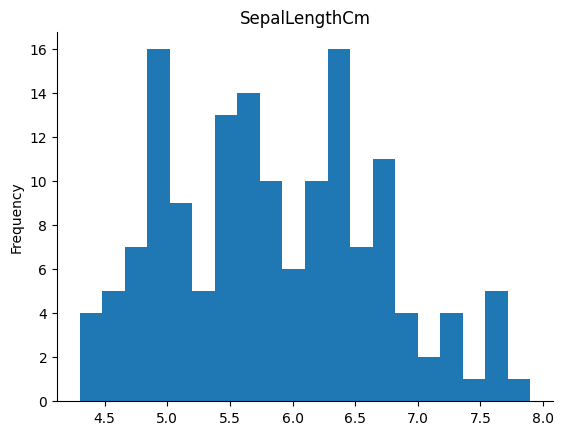

In [13]:
from matplotlib import pyplot as plt
df['SepalLengthCm'].plot(kind='hist', bins=20, title='SepalLengthCm')
plt.gca().spines[['top', 'right',]].set_visible(False)

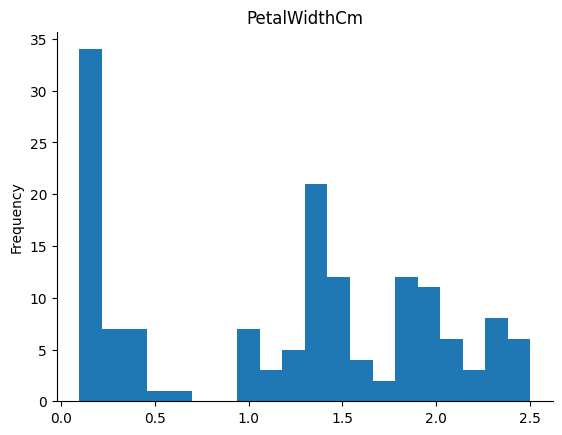

In [14]:
df['PetalWidthCm'].plot(kind='hist', bins=20, title='PetalWidthCm')
plt.gca().spines[['top', 'right',]].set_visible(False)

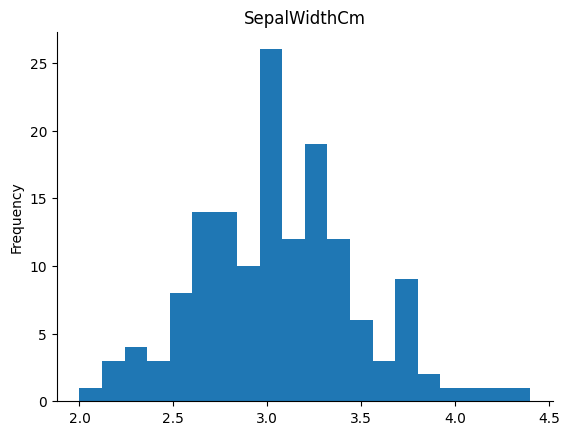

In [15]:
df['SepalWidthCm'].plot(kind='hist', bins=20, title='SepalWidthCm')
plt.gca().spines[['top', 'right',]].set_visible(False)

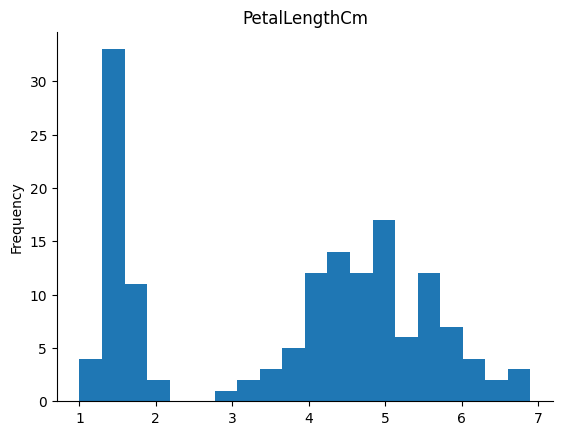

In [16]:
df['PetalLengthCm'].plot(kind='hist', bins=20, title='PetalLengthCm')
plt.gca().spines[['top', 'right',]].set_visible(False)

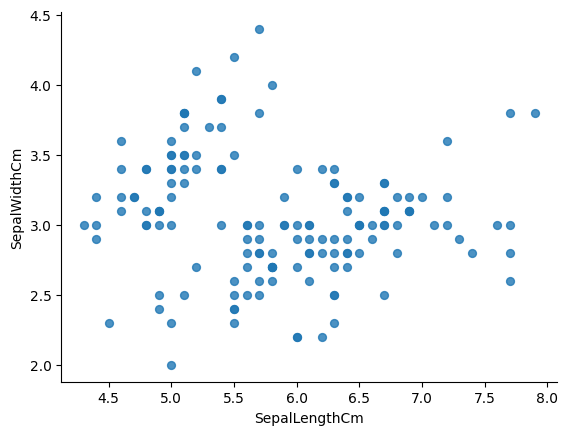

In [17]:
df.plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

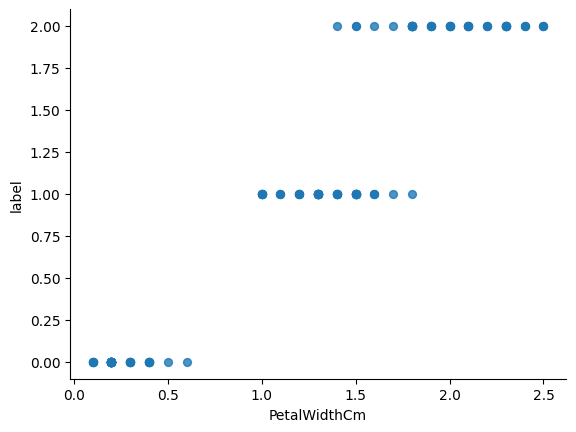

In [18]:
df.plot(kind='scatter', x='PetalWidthCm', y='label', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [19]:
# Drop 'Id' and 'Species' columns
df.drop(['Id', 'Species'], axis = 1, inplace = True)

In [20]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# Split the dataset into features (X) and target (y)


In [21]:
from sklearn.model_selection import train_test_split

X = df.drop(['label'], axis=1)
y = df['label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize RandomForestClassifier

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Calculate accuracy

In [23]:
y_pred = rf_classifier.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict the labels for the test set
y_pred = rf_classifier.predict(X_test)

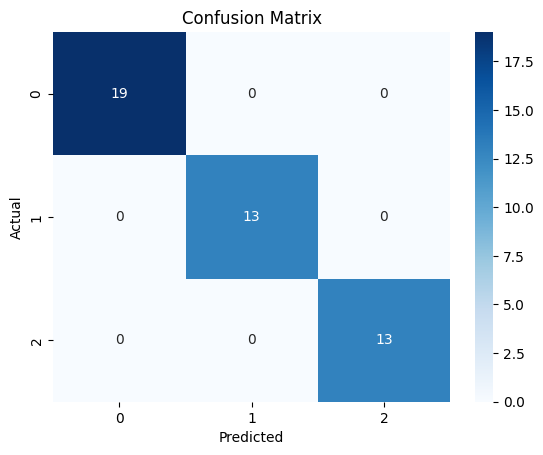

In [25]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()